- add the code below as alternative labeling function
- try other methods that make sense (spectral, min-cut)
- benchmark under which circumstances which tends to work best and how consistent across runs

In [1]:
import numpy as np
import gseapy
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import shortest_path


from geneclusters.cluster_genes_new import assign_cluster_based_on_proba,create_random_labeling, distance_to_probability,get_gene_pathway_matrix, get_full_matrix_from_bipartite,run_KL, compute_cost_metrics, add_outer, get_kernighan_lin_clusters, create_nonrandom_labeling


In [2]:
frame = get_kernighan_lin_clusters('./examples/WikiPathway_2021_Human.npy', 262, 0, KL_modified=True, random_labels=False, unweighted=True)

get
test


4it [02:51, 42.78s/it, tot_impr=7753, last_impr=0, loss=18990]   


In [3]:
frame = get_kernighan_lin_clusters('./examples/WikiPathway_2021_Human.npy', 262, 0, KL_modified=True, random_labels=False, unweighted=False)

get
test


5it [02:48, 33.79s/it, tot_impr=7883, last_impr=0, loss=18867]   


In [2]:
frame = get_kernighan_lin_clusters('./examples/WikiPathway_2021_Human.npy', 262, 0.1, KL_modified=True, random_labels=False, unweighted=False)

get
test


5it [02:42, 32.44s/it, tot_impr=7467, last_impr=0, loss=19267]   


In [7]:
frame = get_kernighan_lin_clusters('./examples/WikiPathway_2021_Human.npy', 30, 0.1, KL_modified=True, random_labels=True, unweighted=False)

get


4it [02:12, 33.03s/it, tot_impr=7400, last_impr=0, loss=19349]   


In [6]:
# compute losses against the original matrix to make sure nothing is going wrong
# remove the random seeds
# (or add random seed as an argument)
# compare performance of the different variants of this method and also of the other methods of interest

29.751908396946565

In [4]:
frame = get_kernighan_lin_clusters('./examples/WikiPathway_2021_Human.npy', 262, 0.1, KL_modified=True, random_labels=False, unweighted=False)

get
test


1it [01:02, 62.11s/it, tot_impr=19130, last_impr=19130, loss=4442666]


KeyboardInterrupt: 

In [3]:
path = './examples/WikiPathway_2021_Human.npy'
mat = get_gene_pathway_matrix(path)
matrix = np.ascontiguousarray(mat.values.T)
#matrix2 = matrix.copy()

In [4]:
full_matrix = get_full_matrix_from_bipartite(matrix)

In [13]:
index_genes = np.sum(full_matrix, axis = 0)
graph = csr_matrix(full_matrix)
index_genes = np.argsort(-index_genes)[:262]

In [14]:
dist_matrix = shortest_path(csgraph=graph,directed=False, indices=index_genes, return_predecessors=False, unweighted = True)

In [20]:
proba = distance_to_probability(dist_matrix)
assignment = assign_cluster_based_on_proba(proba)

test


In [25]:
graph.ceil()

<7795x7795 sparse matrix of type '<class 'numpy.float64'>'
	with 53666 stored elements in Compressed Sparse Row format>

In [22]:
np.unique(assignment, return_counts = True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [ ]:
a = create_nonrandom_labeling(matrix, 40, False, 0.1)

In [4]:
import numba as nb
@nb.njit()
def invert_weights(matrix, c):
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            val = max(matrix[i,j], c)
            #if val!=0:
            matrix[i,j] = 1/val

In [5]:
invert_weights(matrix, 0.1)

In [6]:
full_matrix = get_full_matrix_from_bipartite(matrix)

In [7]:
index_genes = np.sum(full_matrix, axis = 0)

In [13]:
np.argsort(-index_genes)[:10]

array([7721, 7370, 7685, 7734, 7521, 7679, 7783, 7533, 7725, 7474])

In [13]:
index_genes = (np.sum(full_matrix, axis = 0)>40000)
graph = csr_matrix(full_matrix)

In [1]:
index_genes

NameError: name 'index_genes' is not defined

In [ ]:
dist_matrix = shortest_path(csgraph=graph,directed=False, indices=np.where(index_genes)[0], return_predecessors=False, unweighted = False)

In [14]:
len(np.where(index_genes)[0])

622

In [6]:
frame = get_kernighan_lin_clusters('./examples/WikiPathway_2021_Human.npy', 40, 0, KL_modified=True, random_labels=False, unweighted=True)

get


5it [02:40, 32.10s/it, tot_impr=7576, last_impr=0, loss=19154]   


In [2]:
frame = get_kernighan_lin_clusters('./examples/WikiPathway_2021_Human.npy', 40, 0, KL_modified=True, random_labels=False, unweighted=True)

get
test


5it [02:46, 33.20s/it, tot_impr=7762, last_impr=0, loss=18985]   


In [2]:
frame = get_kernighan_lin_clusters('./examples/WikiPathway_2021_Human.npy', 40, 0.1, KL_modified=True, random_labels=False, unweighted=False)

get
test


5it [02:39, 31.98s/it, tot_impr=7770, last_impr=0, loss=18970]   


In [7]:
path = './examples/WikiPathway_2021_Human.npy'
mat = get_gene_pathway_matrix(path)
matrix = np.ascontiguousarray(mat.values.T)
full_matrix = get_full_matrix_from_bipartite(matrix)
index_genes = (np.sum(full_matrix, axis = 0)>40)
graph = csr_matrix(full_matrix)

In [10]:
print(graph.floor())

  (0, 1584)	1.0
  (0, 2326)	1.0
  (0, 4244)	1.0
  (0, 4245)	1.0
  (0, 6820)	1.0
  (0, 6821)	1.0
  (0, 6822)	1.0
  (0, 6823)	1.0
  (0, 6824)	1.0
  (1, 943)	1.0
  (1, 1208)	1.0
  (1, 1218)	1.0
  (1, 1451)	1.0
  (1, 2195)	1.0
  (1, 2199)	1.0
  (1, 2394)	1.0
  (1, 2611)	1.0
  (1, 2612)	1.0
  (1, 2613)	1.0
  (1, 2676)	1.0
  (1, 2732)	1.0
  (1, 3357)	1.0
  (1, 3439)	1.0
  (1, 3594)	1.0
  (1, 3978)	1.0
  :	:
  (7780, 7263)	1.0
  (7780, 7291)	1.0
  (7780, 7462)	1.0
  (7780, 7737)	1.0
  (7780, 7738)	1.0
  (7780, 7788)	1.0
  (7781, 7432)	1.0
  (7782, 7322)	1.0
  (7782, 7501)	1.0
  (7783, 7744)	1.0
  (7783, 7747)	1.0
  (7784, 7779)	1.0
  (7785, 7450)	1.0
  (7785, 7672)	1.0
  (7786, 7178)	1.0
  (7787, 7179)	1.0
  (7788, 7409)	1.0
  (7789, 7655)	1.0
  (7790, 7597)	1.0
  (7791, 7597)	1.0
  (7792, 7641)	1.0
  (7793, 7262)	1.0
  (7793, 7417)	1.0
  (7794, 7358)	1.0
  (7794, 7452)	1.0


In [12]:
np.mean(np.unique(frame[0], return_counts = True)[1])

29.751908396946565

In [3]:
frame = get_kernighan_lin_clusters('./examples/WikiPathway_2021_Human.npy', 30, 0, KL_modified=True, random_labels=True, unweighted=True)

get


4it [02:10, 32.65s/it, tot_impr=7400, last_impr=0, loss=19349]   


In [2]:
path = './examples/WikiPathway_2021_Human.npy'
mat = get_gene_pathway_matrix(path)
matrix = np.ascontiguousarray(mat.values.T)

a = create_nonrandom_labeling(matrix, 10, True)
#b = create_random_labeling(matrix, np.ceil(np.mean(np.unique(a, return_counts = True)[1])))

In [6]:
full_matrix = get_full_matrix_from_bipartite(matrix)
index_genes = (np.sum(full_matrix, axis = 0)>40)

graph = csr_matrix(full_matrix)
dist_matrix = shortest_path(csgraph=graph,directed=False, indices=np.where(index_genes)[0], return_predecessors=False, unweighted = True)

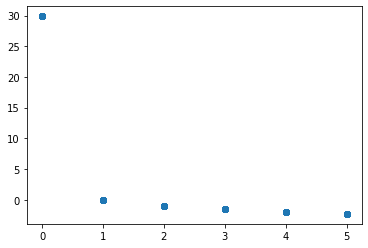

In [43]:
plt.scatter(dist_matrix.ravel()+10e-10, -np.log2(dist_matrix.ravel()+10e-10))

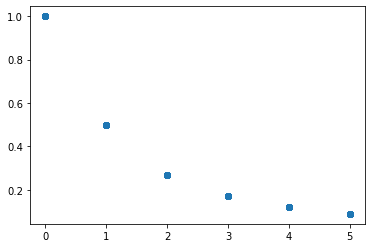

In [45]:
plt.scatter(dist_matrix.ravel()+10e-10, sig(-np.log2(dist_matrix.ravel()+10e-10)))

In [11]:
import numba as nb
@nb.njit()
def sigmoid(x):
    return 1/(1 + np.exp(-x))

@nb.njit()
def distance_to_probability(dist_matrix):
    #inv_df = 1/(dist_matrix+10e-10)
    #df = inv_df/np.sum(inv_df, axis = 0)
    
    temp = dist_matrix+10e-10  
    return sigmoid(-np.log2(temp))


In [12]:
distance_to_probability(dist_matrix)

array([[0.17009382, 0.17009382, 0.17009382, ..., 0.17009382, 0.17009382,
        0.17009382],
       [0.17009382, 0.17009382, 0.17009382, ..., 0.17009382, 0.17009382,
        0.17009382],
       [0.11920292, 0.17009382, 0.17009382, ..., 0.17009382, 0.17009382,
        0.17009382],
       ...,
       [0.26894142, 0.11920292, 0.17009382, ..., 0.26894142, 0.26894142,
        0.17009382],
       [0.26894142, 0.17009382, 0.11920292, ..., 0.26894142, 0.26894142,
        0.17009382],
       [0.26894142, 0.26894142, 0.17009382, ..., 1.        , 0.26894142,
        0.17009382]])

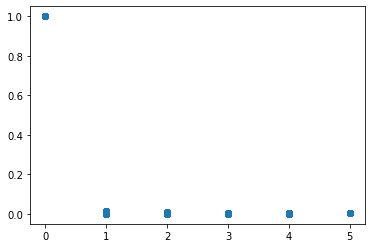

In [46]:
inv_df = 1/(dist_matrix+10e-10)
df = inv_df/np.sum(inv_df, axis = 0)

plt.scatter(dist_matrix.ravel()+10e-10, df)

In [26]:
dist = np.array
-1*np.log2()

-1.584962500721156

In [4]:
import numpy as np 
def sig(x):
 return 1/(1 + np.exp(-x))

In [21]:
sig()

0.11920292202211755

In [5]:
import random
random.choice()

TypeError: choice() missing 1 required positional argument: 'seq'

In [ ]:
a = create_nonrandom_labeling(matrix, 40, True)


In [16]:
b_new = run_KL(b, matrix, 0, False)

1it [00:20, 20.94s/it, tot_impr=0, last_impr=0, loss=19165]


In [17]:
a_new = run_KL(a, matrix, 0, False)

1it [00:20, 20.90s/it, tot_impr=0, last_impr=0, loss=19256]


In [9]:
np.ceil(np.mean(np.unique(a, return_counts = True)[1]))

30.0

In [2]:
frame = get_kernighan_lin_clusters('./examples/WikiPathway_2021_Human.npy', 40, 0, KL_modified=True, random_labels=False, unweighted=True)

get
NR labels


0it [00:17, ?it/s]


KeyboardInterrupt: 

In [2]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import shortest_path
import numba as nb
import random

In [32]:
def get_full_matrix_from_bipartite(matrix):
    m1 = np.concatenate((np.zeros(shape=(matrix.shape[0],matrix.shape[0])), matrix), axis = 1)
    m2 = np.concatenate((matrix.T, (np.zeros(shape=(matrix.shape[1],matrix.shape[1])))), axis = 1)
    return np.concatenate((m2, m1), axis = 0)

@nb.njit()
def invert_weights(matrix, matrix_out):
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            val = matrix[i,j]
            if val!=0:
                matrix_out[i,j] = 1/val
            elif val==0:
                matrix_out[i,j] = val
    return matrix_out

def create_nonrandom_labeling(matrix, centrality, unweighted):
    print('NR labels')
    index_genes = (np.sum(matrix, axis = 0)>centrality)
    full_matrix = get_full_matrix_from_bipartite(matrix)
    
    if not unweighted:
        full_matrix = invert_weights(full_matrix, np.empty_like(matrix))
    graph = csr_matrix(full_matrix)
    dist_matrix = shortest_path(csgraph=graph,directed=False, indices=np.where(index_genes)[0], return_predecessors=False, unweighted = unweighted)
    proba = distance_to_probability(dist_matrix)
    assignment = assign_cluster_based_on_proba(proba)
    return assignment

def distance_to_probability(dist_matrix):
    inv_df = 1/(dist_matrix+10e-10)
    df = inv_df/np.sum(inv_df, axis = 0)
    return df

def assign_cluster_based_on_proba(probas):
    assignment = []
    for node in range(probas.shape[1]):
        #np.random.seed(5)
        x = np.random.choice(range(probas.shape[0]), size = 1, p = probas[:,node])[0]
        assignment.append(x)
    return np.array(assignment)

In [33]:
path = './examples/WikiPathway_2021_Human.npy'
mat = get_gene_pathway_matrix(path)
matrix = np.ascontiguousarray(mat.values.T)

full_matrix = get_full_matrix_from_bipartite(matrix)
index_genes = (np.sum(full_matrix, axis = 0)>40)

graph = csr_matrix(full_matrix)

dist_matrix = shortest_path(csgraph=graph,directed=False, indices=np.where(index_genes)[0], return_predecessors=False, unweighted = True)

df = distance_to_probability(dist_matrix)

assignment = assign_cluster_based_on_proba(df)
#assignment = []
#for node in range(df.shape[1]):
#    x = np.random.choice(range(df.shape[0]), size = 1, p = df[:,node])[0]
#    assignment.append(x)

In [3]:
path = './examples/WikiPathway_2021_Human.npy'
mat = get_gene_pathway_matrix(path)
matrix = np.ascontiguousarray(mat.values.T)

a = create_nonrandom_labeling(matrix, 40, True)
b = create_random

NR labels


In [4]:
np.unique(a, return_counts = True)[1]

array([33, 33, 32, 34, 25, 35, 32, 24, 32, 35, 41, 31, 32, 18, 36, 32, 30,
       27, 28, 22, 23, 38, 27, 33, 29, 30, 27, 26, 33, 25, 27, 23, 43, 27,
       25, 25, 39, 32, 33, 18, 27, 30, 31, 32, 34, 35, 39, 35, 27, 28, 35,
       29, 35, 35, 33, 31, 27, 33, 27, 28, 35, 41, 30, 22, 33, 22, 38, 33,
       29, 27, 21, 34, 28, 36, 33, 25, 26, 28, 31, 31, 29, 33, 37, 23, 32,
       29, 29, 25, 23, 32, 31, 35, 21, 34, 30, 26, 30, 19, 24, 39, 32, 30,
       30, 22, 32, 25, 28, 25, 23, 25, 45, 32, 28, 29, 19, 27, 36, 24, 29,
       21, 32, 40, 39, 30, 30, 32, 30, 26, 26, 23, 36, 33, 31, 30, 27, 25,
       34, 28, 27, 34, 32, 36, 33, 17, 31, 36, 39, 32, 33, 37, 32, 24, 26,
       37, 30, 38, 25, 28, 31, 22, 27, 29, 31, 20, 27, 28, 43, 26, 37, 33,
       33, 36, 31, 27, 35, 28, 33, 27, 25, 33, 44, 29, 25, 27, 30, 36, 36,
       22, 36, 24, 26, 25, 24, 35, 39, 39, 23, 17, 20, 33, 34, 27, 31, 35,
       33, 27, 27, 24, 21, 32, 39, 30, 32, 20, 30, 28, 29, 32, 28, 37, 32,
       35, 25, 24, 24, 31

In [26]:
np.unique(assignment, return_counts = True)[1]

array([36, 39, 25, 31, 31, 31, 30, 29, 34, 31, 36, 25, 29, 27, 28, 30, 36,
       32, 34, 25, 22, 27, 37, 48, 23, 39, 23, 31, 35, 34, 34, 36, 38, 19,
       33, 28, 34, 24, 27, 33, 38, 38, 27, 30, 30, 43, 35, 29, 35, 27, 32,
       29, 35, 35, 24, 29, 35, 25, 25, 30, 32, 23, 37, 22, 37, 22, 24, 30,
       37, 22, 31, 26, 32, 40, 31, 24, 24, 30, 23, 26, 29, 35, 29, 29, 26,
       26, 29, 24, 25, 32, 27, 24, 38, 21, 25, 32, 26, 19, 28, 40, 38, 18,
       37, 38, 26, 27, 36, 26, 25, 28, 34, 37, 30, 28, 37, 28, 42, 28, 26,
       35, 32, 30, 22, 28, 28, 27, 28, 28, 31, 38, 31, 27, 20, 25, 41, 30,
       29, 26, 33, 27, 24, 27, 24, 22, 17, 28, 25, 33, 27, 22, 27, 27, 28,
       27, 37, 23, 32, 22, 36, 31, 31, 34, 13, 30, 31, 26, 37, 36, 19, 28,
       33, 30, 28, 30, 25, 25, 31, 30, 33, 37, 38, 25, 27, 33, 27, 27, 29,
       30, 33, 32, 28, 37, 25, 26, 29, 34, 34, 26, 25, 26, 30, 36, 30, 24,
       37, 32, 29, 28, 25, 23, 33, 36, 23, 31, 27, 27, 25, 31, 35, 30, 31,
       35, 32, 25, 39, 38

In [ ]:
labeling = create_random_labeling(matrix, threshold)

In [ ]:
mat = get_gene_pathway_matrix(path)
    pathway_names = mat.index
    gene_names = mat.columns
    matrix = np.ascontiguousarray(mat.values.T)
    if random_labels:
        labeling = create_random_labeling(matrix, threshold)
    else:
        labeling = create_nonrandom_labeling(matrix, threshold, unweighted)
    run_KL(labeling, matrix, 0, KL_modified)

In [4]:
frame = get_kernighan_lin_clusters('./examples/WikiPathway_2021_Human.npy', 40, 0, KL_modified=True, random_labels=False, unweighted=True)

get
NR labels


0it [00:54, ?it/s]


KeyboardInterrupt: 

In [7]:
frame

,0,description,is_gene
0,49,A3GALT2,True
1,179,A4GALT,True
2,26,AADAT,True
3,131,AAMP,True
4,16,AANAT,True
...,...,...,...
7790,97,Wnt signaling pathway and pluripotency WP399,False
7791,129,Wnt Signaling Pathway WP363,False
7792,97,Wnt signaling WP428,False
7793,129,Wnt/beta-catenin signaling pathway in leukemia...,False


In [13]:
x = gseapy.get_library('WikiPathway_2021_Human')


In [14]:
x = gseapy.get_library('WikiPathway_2021_Human')

np.save('./examples/WikiPathway_2021_Human.npy', x)

In [ ]:
# compare the outputs of each function to find the differences between mine and G's
# then compare which options create the smallest lost (include spectral and others?)

In [3]:
path = './examples/WikiPathway_2021_Human.npy'
mat = get_gene_pathway_matrix(path)
matrix = np.ascontiguousarray(mat.values.T)

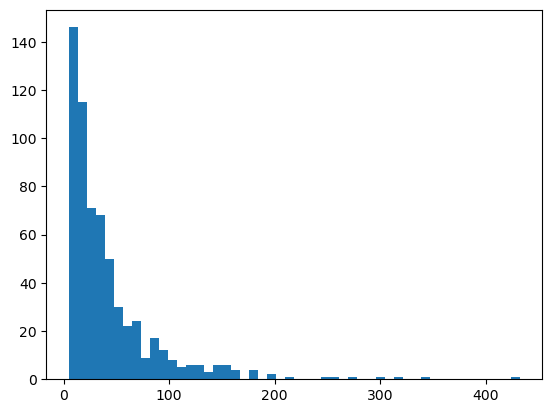

In [39]:
import matplotlib.pyplot as plt
plt.hist(np.sum(matrix, axis = 0), 50)
plt.show()

In [13]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import shortest_path
import numba as nb
import random

In [9]:
def get_full_matrix_from_bipartite(matrix):
    m1 = np.concatenate((np.zeros(shape=(matrix.shape[0],matrix.shape[0])), matrix), axis = 1)
    m2 = np.concatenate((matrix.T, (np.zeros(shape=(matrix.shape[1],matrix.shape[1])))), axis = 1)
    return np.concatenate((m2, m1), axis = 0)

@nb.njit()
def invert_weights(matrix):
    matrix_out = np.empty_like(matrix)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            val = matrix[i,j]
            if val!=0:
                matrix_out[i,j] = 1/val
            elif val==0:
                matrix_out[i,j] = val
    return matrix_out

def create_nonrandom_labeling(matrix, centrality, unweighted):
    index_genes = (np.sum(matrix, axis = 1)>centrality)
    full_matrix = get_full_matrix_from_bipartite(matrix)
    if not unweighted:
        full_matrix = invert_weights(full_matrix)
    graph = csr_matrix(full_matrix)
    dist_matrix = shortest_path(csgraph=graph,directed=False, indices=np.where(index_genes)[0], return_predecessors=False, unweighted = unweighted)
    proba = distance_to_probability(dist_matrix)
    assignment = assign_cluster_based_on_proba(proba)
    return assignment

def distance_to_probability(dist_matrix):
    inv_df = 1/(dist_matrix+10e-10)
    df = inv_df/np.sum(inv_df, axis = 0)
    return df

def assign_cluster_based_on_proba(probas):
    assignment = []
    for node in range(probas.shape[1]):
        np.random.seed(5)
        x = np.random.choice(range(probas.shape[0]), size = 1, p = probas[:,node])[0]
        assignment.append(x)
    return assignment

In [13]:
index_genes

array([False, False, False, ..., False, False, False])

In [ ]:
full_matrix = get_full_matrix_from_bipartite(matrix)
graph = csr_matrix(full_matrix)
index_genes = (np.sum(matrix, axis = 0)>40)
dist_matrix = shortest_path(csgraph=graph,directed=False, indices=np.where(index_genes)[1], return_predecessors=False, unweighted = True)

IndexError: tuple index out of range

In [ ]:
proba = distance_to_probability(dist_matrix)
assignment = assign_cluster_based_on_proba(proba)


In [98]:
dist_matrix2 = shortest_path(csgraph=graph,directed=False, indices=range(2), return_predecessors=False, unweighted = False)

In [85]:
proba = distance_to_probability(dist_matrix)
assignment = assign_cluster_based_on_proba(proba)

proba2 = distance_to_probability(dist_matrix2)

In [88]:
assignment = assign_cluster_based_on_proba(proba)
assignment2 = assign_cluster_based_on_proba(proba2)

In [99]:
np.array_equal(dist_matrix, dist_matrix2)

True

In [94]:
m = invert_weights(full_matrix)

In [95]:
np.array_equal(m, full_matrix)

True

In [67]:
random.seed(5)
labs = create_nonrandom_labeling(matrix, 40, False)

In [68]:
random.seed(5)

labs2 = create_nonrandom_labeling(matrix, 40, True)

In [64]:
m = invert_weights(matrix)

In [65]:
np.array_equal(matrix, m)

True

In [72]:
labs

[24,
 48,
 44,
 17,
 45,
 6,
 6,
 25,
 7,
 47,
 6,
 19,
 39,
 5,
 42,
 22,
 40,
 29,
 42,
 16,
 9,
 12,
 20,
 43,
 28,
 44,
 6,
 38,
 32,
 37,
 46,
 30,
 28,
 6,
 45,
 0,
 6,
 39,
 43,
 2,
 14,
 1,
 4,
 11,
 17,
 23,
 42,
 31,
 45,
 25,
 26,
 37,
 47,
 14,
 2,
 11,
 39,
 27,
 20,
 14,
 6,
 35,
 48,
 10,
 26,
 43,
 19,
 35,
 45,
 46,
 38,
 18,
 36,
 10,
 47,
 11,
 9,
 24,
 48,
 22,
 7,
 17,
 44,
 17,
 38,
 12,
 45,
 21,
 2,
 35,
 32,
 38,
 0,
 21,
 13,
 35,
 16,
 33,
 22,
 18,
 23,
 13,
 41,
 43,
 25,
 4,
 42,
 18,
 2,
 45,
 40,
 28,
 22,
 32,
 6,
 40,
 33,
 46,
 44,
 48,
 46,
 26,
 45,
 34,
 3,
 34,
 33,
 10,
 10,
 41,
 29,
 4,
 42,
 35,
 30,
 46,
 12,
 12,
 12,
 40,
 7,
 13,
 22,
 44,
 48,
 32,
 40,
 3,
 38,
 10,
 1,
 40,
 16,
 22,
 36,
 21,
 36,
 39,
 44,
 35,
 6,
 35,
 27,
 18,
 32,
 21,
 34,
 1,
 0,
 22,
 28,
 23,
 9,
 26,
 21,
 45,
 26,
 40,
 16,
 24,
 34,
 36,
 14,
 26,
 24,
 23,
 35,
 29,
 9,
 43,
 32,
 22,
 29,
 31,
 6,
 46,
 32,
 38,
 38,
 10,
 36,
 11,
 35,
 16,
 10,
 8,
 43,

In [41]:
mat_out = invert_weights(matrix)

In [44]:
np.array_equal(mat_out, matrix)

True

In [34]:
full = get_full_matrix_from_bipartite(matrix)
graph = csr_matrix(full*-1)
dist_matrix = shortest_path(csgraph=graph,directed=False, indices=0, return_predecessors=False, unweighted = False)


NegativeCycleError: Negative cycle detected on node 0

In [475]:
index_genes = (np.sum(matrix, axis = 1)>40)

In [476]:
len(index_genes)

7173

In [477]:
matrix.shape

(7173, 622)

In [ ]:
# label other genes and pathways probabilistically based on their connection to the index_genes
# count how far a given node is from an index gene and convert that into a set of probabilities to assign
# to each cluster
# why probabalistic and not deterministic?
### count how many edges separate a given node from an index_gene (shortest path)

In [19]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import shortest_path


In [ ]:
path = './examples/WikiPathway_2021_Human.npy'
mat = get_gene_pathway_matrix(path)
matrix = np.ascontiguousarray(mat.values.T)

m1 = np.concatenate((np.zeros(shape=(matrix.shape[0],matrix.shape[0])), matrix), axis = 1)
m2 = np.concatenate((matrix.T, (np.zeros(shape=(matrix.shape[1],matrix.shape[1])))), axis = 1)
full_matrix = np.concatenate((m2, m1), axis = 0)
full_matrix.shape

full_matrix = get_full_matrix_from_bipartite(matrix)
index_genes = (np.sum(full_matrix, axis = 0)>40)

graph = csr_matrix(full_matrix)

dist_matrix = shortest_path(csgraph=graph,directed=False, indices=np.where(index_genes)[0], return_predecessors=False, unweighted = True)

df = distance_to_probability(dist_matrix)

assignment = []
for node in range(df.shape[1]):
    x = np.random.choice(range(df.shape[0]), size = 1, p = df[:,node])[0]
    assignment.append(x)

In [18]:
path = './examples/WikiPathway_2021_Human.npy'
mat = get_gene_pathway_matrix(path)
matrix = np.ascontiguousarray(mat.values.T)


(7795, 7795)

In [20]:
full_matrix = get_full_matrix_from_bipartite(matrix)
index_genes = (np.sum(full_matrix, axis = 0)>40)

In [38]:
index_genes = (np.sum(full_matrix, axis = 0)>40)

In [25]:
len(index_genes)

7795

In [21]:
graph = csr_matrix(full_matrix)


In [22]:
dist_matrix = shortest_path(csgraph=graph,directed=False, indices=np.where(index_genes)[0], return_predecessors=False, unweighted = True)

In [23]:
df = distance_to_probability(dist_matrix)

assignment = []
for node in range(df.shape[1]):
    x = np.random.choice(range(df.shape[0]), size = 1, p = df[:,node])[0]
    assignment.append(x)

In [24]:
np.unique(assignment, return_counts = True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [30]:
size = np.median(np.unique(assignment, return_counts = True)[1])
size

30.0

In [ ]:
# does kernighan lin work with unequal cluster sizes? our implementation should right?

In [ ]:
np.random.seed(10)
labeling = prev_create_random_labeling(matrix, size)
labeling_temp = labeling.copy()
print('before')
print(labeling)
run_KL(labeling, matrix, 0, True)
print('after')
print(labeling)

In [490]:
np.unique(labeling, return_counts = True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [488]:
np.random.seed(5)
labeling = np.array(assignment)
print('before')
print(labeling)
run_KL(labeling, matrix, 0, True)
print('after')
print(labeling)

0it [00:00, ?it/s]

before
[ 76  18  90 ... 261 159 222]
t


5it [01:47, 21.58s/it, tot_impr=7529, last_impr=0, loss=19217]   

after
[251  65 151 ...  10 260 222]


In [292]:
labeling = prev_create_random_labeling(matrix, size)


In [294]:
np.unique(labeling, return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 array([156, 156, 156, 156, 156, 156, 156, 156, 156, 155, 156, 156, 156,
        156, 156, 156, 156, 156, 156, 155, 156, 156, 156, 156, 156, 156,
        156, 156, 156, 155, 156, 156, 156, 156, 156, 156, 156, 156, 156,
        155, 156, 156, 156, 156, 156, 156, 156, 156, 156, 155]))

In [37]:
len(np.sum(matrix, axis = 1))

7173

In [6]:
np.random.seed(5)
x_sample = np.random.randint(0, matrix.shape[0], 500)
y_sample = np.random.randint(0, matrix.shape[1], 40)
matrix_subsampled = matrix[x_sample][:,y_sample]

In [11]:
matrix_subsampled = matrix

In [18]:
np.random.seed(5)
labeling = prev_create_random_labeling(matrix_subsampled, 100)
print('before')
print(labeling)
prev_kernighan_lin(matrix_subsampled, labeling, 0)
prev_evaluate_cut(matrix_subsampled, labeling, 0)
print('after')
print(labeling)
labeling1 = labeling.copy()

0it [00:00, ?it/s]

before
[38  8 52 ... 40 22 29]


4it [03:21, 50.28s/it, tot_impr=10756.0, last_impr=0, loss=15752]      

after
[29 32 29 ... 11 62 67]


In [13]:
labeling

array([355, 306,   2, ..., 313, 245, 164])

In [21]:
np.unique(labeling, return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77]),
 array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100,  99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100,  99, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100,  99, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100,  99, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,  99]))

In [19]:
np.random.seed(5)
labeling = prev_create_random_labeling(matrix_subsampled, 100)
labeling_temp = labeling.copy()
print('before')
print(labeling)
run_KL(labeling, matrix_subsampled, 0, True)
print('after')
print(labeling)

0it [00:00, ?it/s]

before
[38  8 52 ... 40 22 29]
t


4it [02:53, 43.25s/it, tot_impr=10961, last_impr=0, loss=15547]    

after
[41 29 53 ... 62 62 58]


In [20]:
np.unique(labeling==labeling1, return_counts = True)

(array([False,  True]), array([5693, 2102]))

In [7]:
np.unique(labeling, return_counts = True)

(array([0, 1, 2, 3, 4, 5]), array([20, 20, 20, 20, 20, 20]))

In [39]:
np.random.seed(5)
labeling = prev_create_random_labeling(matrix_subsampled, 20)
labeling_temp = labeling.copy()
print('before')
print(labeling)
run_KL(labeling, matrix_subsampled, 0, False)
print('after')
print(labeling)

2it [00:00, 207.92it/s, tot_impr=22, last_impr=0, loss=2]

before
[3 2 1 0 4 1 2 2 2 3 1 1 0 3 3 0 5 4 5 4 1 2 2 3 1 2 4 5 4 2 3 1 3 4 3 5 2
 2 0 1 2 2 0 1 1 4 2 4 3 4 4 1 5 5 4 3 1 1 1 1 3 0 5 0 2 4 0 4 4 5 4 0 1 3
 0 1 5 2 1 0 5 0 2 0 5 5 4 0 5 2 0 0 4 4 5 2 3 3 3 2 5 5 2 0 3 0 4 1 1 3 5
 5 0 3 0 5 3 5 3 4]
after
[0 2 4 0 4 0 2 2 2 0 2 2 0 4 3 0 1 4 3 4 1 2 2 3 1 5 4 5 4 2 3 1 3 4 3 5 1
 2 0 1 5 2 3 1 1 3 2 4 3 4 4 1 5 5 4 3 1 1 5 1 3 0 5 0 2 4 0 4 4 5 4 1 1 3
 0 5 5 2 1 0 5 0 1 0 1 3 4 3 5 2 0 0 4 4 5 2 3 3 3 2 5 2 2 0 3 4 5 1 1 0 5
 5 0 3 0 5 3 5 2 1]


In [7]:
A = np.where(labeling_temp == 0)[0]
B = np.where(labeling_temp == 1)[0]
cross_costs, D = compute_cost_metrics(labeling_temp, matrix_subsampled, A, B, 0)
pairwise_d_sums = add_outer(cross_costs, D, A, B)
g = pairwise_d_sums-2*cross_costs

In [15]:
done_a = []
done_b = []
    
#g = 0
gs = []
swaps = []
cross_costs2 = prev_get_cross_costs(matrix_subsampled, A, B, 0)
all_improvements, A, B = prev_get_pairwise_improvements(matrix_subsampled, labeling_temp, 0, 1, 0)

In [16]:
np.array_equal(cross_costs, cross_costs2)

True

In [17]:
np.array_equal(g, all_improvements)

True

In [18]:
ix = np.argmax(all_improvements)
a, b = ix // all_improvements.shape[1], ix % all_improvements.shape[1]
done_a.append(a)
done_b.append(b)
ra = A[a]
rb = B[b]

In [42]:
x = g[0:10,0:10]

In [77]:
g.shape

(20, 20)

In [19]:
it = 1
start = g.shape[0]-it
end = g.shape[0]-it+1

In [20]:
g[start:end]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0., -1.,
         0.,  0.,  0.,  0.,  0., -1.,  0.]])

In [22]:
start

19

In [23]:
end

20

In [27]:
print(labeling_temp)
labeling_temp[ra], labeling_temp[rb] = labeling_temp[rb], labeling_temp[ra]
print(labeling_temp)

[3 2 1 0 4 1 2 2 2 3 1 1 0 3 3 0 5 4 5 4 1 2 2 3 1 2 4 5 4 2 3 1 3 4 3 5 2
 2 0 1 2 2 0 1 1 4 2 4 3 4 4 1 5 5 4 3 1 1 1 1 3 0 5 0 2 4 0 4 4 5 4 0 1 3
 0 1 5 2 1 0 5 0 2 0 5 5 4 0 5 2 0 0 4 4 5 2 3 3 3 2 5 5 2 0 3 0 4 1 1 3 5
 5 0 3 0 5 3 5 3 4]
[3 2 0 0 4 1 2 2 2 3 1 1 0 3 3 0 5 4 5 4 1 2 2 3 1 2 4 5 4 2 3 1 3 4 3 5 2
 2 0 1 2 2 0 1 1 4 2 4 3 4 4 1 5 5 4 3 1 1 1 1 3 0 5 0 2 4 0 4 4 5 4 1 1 3
 0 1 5 2 1 0 5 0 2 0 5 5 4 0 5 2 0 0 4 4 5 2 3 3 3 2 5 5 2 0 3 0 4 1 1 3 5
 5 0 3 0 5 3 5 3 4]


In [20]:
x, y = g.shape
g_max_temp = np.argmax(g)
i = g_max_temp // y
j = g_max_temp % y
index1 = A[i]
index2 = B[j]

In [25]:
print(index1)
print(index2)

71
2


In [29]:
print(A)
print(B)
A = A[A!=index1]
A = np.append(A, index2)
B = B[B!=index2]
B = np.append(B, index1)
print(A)
print(B)

[  3  12  15  38  42  61  63  66  71  74  79  81  83  87  90  91 103 105
 112 114]
[  2   5  10  11  20  24  31  39  43  44  51  56  57  58  59  72  75  78
 107 108]
[  3  12  15  38  42  61  63  66  74  79  81  83  87  90  91 103 105 112
 114   2]
[  5  10  11  20  24  31  39  43  44  51  56  57  58  59  72  75  78 107
 108  71]


In [36]:
cross_costs, D = compute_cost_metrics(labeling_temp, matrix_subsampled, A, B, 0)
pairwise_d_sums = add_outer(cross_costs, D, A, B)
g = pairwise_d_sums-2*cross_costs

In [37]:
g

array([[ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0., -1.,  0.,
         0.,  0.,  0.,  0., -1., -2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0., -1.,  0.,
         0.,  0.,  0.,  0., -1., -2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0., -1.,  0.,
         0.,  0.,  0.,  0., -1., -2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0., -1.,  0.,
         0.,  0.,  0.,  0., -1., -2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0., -1.,  0.,
         0.,  0.,  0.,  0., -1., -2., -1.],
       [-1., -1., -1., -1., -1., -1., -2., -1., -1., -1., -1., -2., -1.,
        -1., -1., -1., -1., -2., -3., -2.],
       [-1., -1., -1., -1., -1., -1., -2., -1., -1., -1., -1., -2., -1.,
        -1., -1., -1., -1., -2., -3., -2.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0., -1.,  0.,
         0.,  0.,  0.,  0., -1., -2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0., -